In [1]:
import numpy as np
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import os
import tensorflow as tf

In [2]:
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

Using TensorFlow backend.


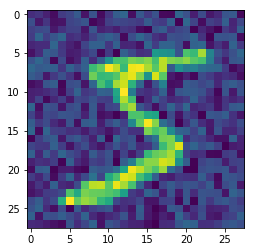

In [3]:
x_train = x_train.astype('float32') / 255.0
plt.imshow(x_train[0] + 0.5 * np.random.uniform(low = 0.0, high = 1.0, size = x_train[0].shape))

In [4]:
data_list = []
noise_factor = 0.5
for i in range(60000):
    img = x_train[i]
    final_img = img + (noise_factor * np.random.uniform(low = 0.0, high = 1.0, size = img.shape))
    data_list.append(final_img)
x_train_noisy = np.array(data_list)

In [5]:
x_train_noisy.shape

(60000, 28, 28)

In [6]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Activation
import keras.backend as K

In [7]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format


x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

W0927 06:01:47.782806  7708 deprecation_wrapper.py:119] From c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0927 06:01:47.820833  7708 deprecation_wrapper.py:119] From c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0927 06:01:47.829863  7708 deprecation_wrapper.py:119] From c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0927 06:01:47.869421  7708 deprecation_wrapper.py:119] From c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is depre

In [8]:
x_train_noisy = np.reshape(x_train_noisy, (60000, 28, 28, 1))
x_train = np.reshape(x_train, (60000, 28, 28, 1))

In [9]:
autoencoder.fit(x_train_noisy, x_train, epochs=1,
                batch_size=128)

W0927 06:01:54.933549  7708 deprecation_wrapper.py:119] From c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/1
60000/60000 [==============================] - 229s 4ms/step - loss: 0.1351


In [10]:
pred = autoencoder.predict(x_train_noisy)

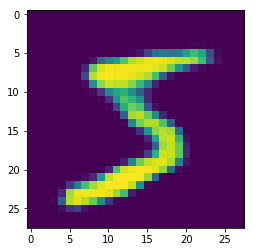

In [15]:
plt.imshow(np.reshape(pred[0], (28, 28)))

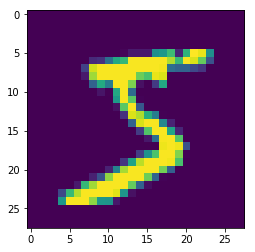

In [18]:
plt.imshow(np.reshape(x_train[0], (28, 28)))